In [2]:
%load_ext autoreload
%autoreload 2
from src.models.vae import *
from src.data.data_loader import (
    get_loader, 
    TwitterDataset, 
    character_set, 
    character_to_number
)

from src.models.common import (
    EmbeddingPacked,
    get_numpy,
    get_variable,
    simple_elementwise_apply,
    cuda,
)

from torch.nn.utils.rnn import pack_padded_sequence

In [3]:
enc = Encoder()

In [4]:
data = pd.read_pickle("../data/interim/hydrated/200316.pkl")
train_set = TwitterDataset(data.iloc[0:3000, :])
train_loader = get_loader(train_set, 500)

In [5]:
rvae = RecurrentVariationalAutoencoder()
vi = VariationalInference()

optimizer = Adam(rvae.parameters(), lr=0.001)


In [6]:
from tqdm import tqdm


training_loss = []

for i in range(5):

    # Track loss
    epoch_training_loss = []

    rvae.train()

    # For each sentence in training set
    for x in tqdm(train_loader):

        x = get_variable(x)

        # Forward pass
        loss, diagnostics, outputs = vi(rvae, x)

        if loss.isnan():
            raise ValueError

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # List of (batch_size, average loss) 
        epoch_training_loss.append((
            x.batch_sizes[0].numpy(),
            get_numpy(loss.detach()),
        ))

    # Save loss for plot
    weigths, batch_average = zip(*epoch_training_loss)
    training_loss.append(np.average(batch_average, weights=weigths))


100%|██████████| 6/6 [02:45<00:00, 27.51s/it]


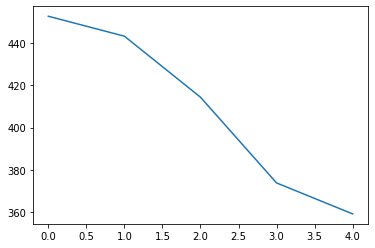

487.4368896484375

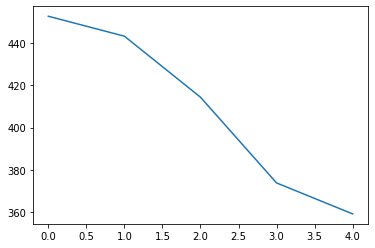

In [8]:
import matplotlib.pyplot as plt 
plt.plot(training_loss)

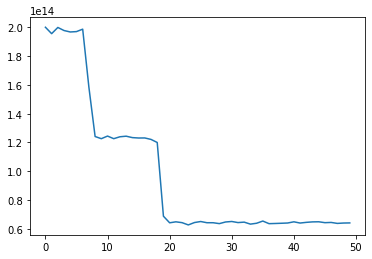

In [9]:
64039280043535 / 300_000

213464266.81178334

In [10]:
loss, diagnostics, outputs = vi(rvae, x)

In [11]:
loss

tensor(347.7517, grad_fn=<NegBackward>)

In [12]:
x

PackedSequence(data=tensor([18, 24, 51,  ..., 53, 53, 53]), batch_sizes=tensor([500, 500, 500, 500, 500, 497, 497, 495, 492, 491, 490, 487, 485, 483,
        480, 479, 478, 472, 468, 467, 465, 459, 459, 456, 452, 450, 449, 447,
        440, 436, 432, 431, 428, 425, 424, 423, 422, 419, 418, 416, 415, 412,
        410, 407, 404, 403, 399, 397, 395, 392, 389, 385, 381, 379, 377, 374,
        373, 369, 366, 361, 358, 357, 351, 345, 341, 336, 333, 328, 328, 323,
        319, 317, 312, 308, 305, 302, 300, 296, 294, 292, 291, 289, 283, 278,
        274, 270, 268, 262, 258, 253, 249, 247, 242, 239, 238, 235, 231, 230,
        228, 225, 221, 220, 217, 215, 212, 207, 206, 204, 201, 198, 193, 192,
        190, 189, 187, 183, 182, 180, 177, 175, 174, 173, 173, 173, 169, 167,
        166, 165, 162, 161, 158, 153, 149, 148, 148, 145, 143, 142, 140, 138,
        137, 137, 135, 135, 135, 134, 134, 134, 134, 133, 131, 131, 129, 129,
        128, 127, 125, 123, 121, 118, 118, 116, 115, 115, 114, 114, 11